#                                         WORLD HAPPINESS REPORT PROJECT

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings

# Ignoring warnings for cleaner output
warnings.filterwarnings('ignore')

# Importing additional libraries for modeling and evaluation
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier, ExtraTreesRegressor 
from xgboost import XGBRegressor

In [2]:
# Loading the dataset from the given URL
df=pd.read_csv("happiness_score_dataset.csv")

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
# Displaying the first ten rows of the dataset to get a sense of its structure
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [5]:
# Displaying the last ten rows of the dataset to get a sense of its structure
df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
# Displaying the dimensions of the dataset (number of rows and columns)
print(df.shape)

(158, 12)


In [7]:
# Renaming specific columns in the DataFrame for better readability or compatibility
df.rename(columns={
    'Happiness Rank': 'Happiness_Rank', 
    'Happiness Score': 'Happiness_Score',
    'Standard Error': 'Standard_Error', 
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',
    'Health (Life Expectancy)': 'Health_Life_Expectancy', 
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
}, inplace=True)

In [8]:
df.head(10)

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      158 non-null    object 
 1   Region                       158 non-null    object 
 2   Happiness_Rank               158 non-null    int64  
 3   Happiness_Score              158 non-null    float64
 4   Standard_Error               158 non-null    float64
 5   Economy_GDP_per_Capita       158 non-null    float64
 6   Family                       158 non-null    float64
 7   Health_Life_Expectancy       158 non-null    float64
 8   Freedom                      158 non-null    float64
 9   Trust_Government_Corruption  158 non-null    float64
 10  Generosity                   158 non-null    float64
 11  Dystopia_Residual            158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


The dataset is devoid of any null values, indicating a complete set of information for all the records.

Three distinct data types are present in the dataset, highlighting the varied nature of information encapsulated within.

In [10]:
# Display the number of unique values for each column in the DataFrame
df.nunique()

Country                        158
Region                          10
Happiness_Rank                 157
Happiness_Score                157
Standard_Error                 153
Economy_GDP_per_Capita         158
Family                         158
Health_Life_Expectancy         157
Freedom                        158
Trust_Government_Corruption    157
Generosity                     158
Dystopia_Residual              158
dtype: int64

The 'region' column exhibits a relatively limited diversity with only 10 unique values, suggesting a categorical or regional classification. In contrast, other columns showcase a more extensive range of information, each having 150 or more unique values. This discrepancy in unique value counts implies a potential difference in the nature of data representation between the 'region' feature and other features in the dataset.

# DISTINGUISHING BETWEEN NUMERICAL AND CATEGORICAL COLUMNS

In [11]:
# Identifing and storing numerical columns in a list
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Identifing and storing categorical columns in a list
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [12]:
# Displaying the list of numerical columns
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
['Happiness_Rank', 'Happiness_Score', 'Standard_Error', 'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual']


In [13]:
# Displaying the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
['Country', 'Region']


In [14]:
# Displaying the count of unique values in the 'Region' column
region_value_counts = df['Region'].value_counts()
print(region_value_counts)

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


# CHECKING NULL VALUES AND DUPLICATE VALUES

In [15]:
# Checking and displaying the sum of null values in each column of the DataFrame
null_value_counts = df.isnull().sum()
print(null_value_counts)

Country                        0
Region                         0
Happiness_Rank                 0
Happiness_Score                0
Standard_Error                 0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Dystopia_Residual              0
dtype: int64


The dataset is devoid of any null values, indicating a comprehensive and complete set of information across all columns.

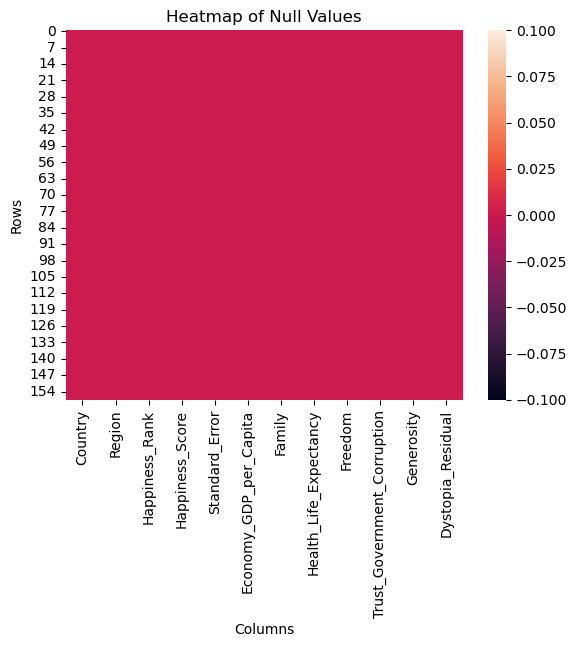

In [16]:
# Creating a heatmap of null values in the DataFrame
# True values are treated as 1 for visualization purpose
sns.heatmap(df.isnull())

# Adding labels and title to the plot
plt.title('Heatmap of Null Values')  # Set the title of the plot
plt.xlabel('Columns')  # Label for the x-axis
plt.ylabel('Rows')  # Label for the y-axis

# Displaying the plot
plt.show()

In [17]:
# Checking for duplicate values in the dataset
# The sum of duplicated rows is calculated and displayed
duplicate_count = df.duplicated().sum()
print("There are {} duplicates present in the dataset".format(duplicate_count))

There are 0 duplicates present in the dataset


# DESCRIPTION OF NUMERICAL VARIABLES

In [18]:
# Generating a general statistical description of numerical variables in the dataset
df.describe()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations from the Statistical Summary of Numerical Variables:

Happiness Rank:
Ranges from 1 to 158.
Mean happiness rank is approximately 79.49.
Standard deviation is 45.75, indicating a notable spread.

Happiness Score:
Ranges from 2.839 to 7.587.
Mean happiness score is approximately 5.38.
Standard deviation is 1.15, suggesting variability in happiness scores.

Standard Error:
Ranges from 0.01848 to 0.13693.
Overall low standard error values, with a mean of approximately 0.048.

Economy (GDP per Capita):
Ranges from 0 to 1.69042.
Mean GDP per capita is approximately 0.85.
Significant variability, as indicated by the standard deviation of 0.40.

Family:
Ranges from 0 to 1.40223.
Mean family score is approximately 0.99.
Moderate variability, with a standard deviation of 0.27.

Health (Life Expectancy):
Ranges from 0 to 1.02525.
Mean life expectancy score is approximately 0.63.
Standard deviation is 0.25, suggesting moderate variability.

Freedom:
Ranges from 0 to 0.66973.
Mean freedom score is approximately 0.43.
Moderate variability, as indicated by the standard deviation of 0.15.

Trust (Government Corruption):
Ranges from 0 to 0.55191.
Mean trust score is approximately 0.14.
Standard deviation is 0.12, suggesting moderate variability.

Generosity:
Ranges from 0 to 0.79588.
Mean generosity score is approximately 0.24.
Limited variability, with a standard deviation of 0.13.

Dystopia Residual:
Ranges from 0.32858 to 3.60214.
Mean dystopia residual is approximately 2.10.
Significant variability, as indicated by the standard deviation of 0.55.

Overall, the dataset exhibits considerable diversity in happiness-related metrics, with each variable demonstrating its unique range and distribution characteristics. The standard deviations provide insights into the degree of variability within each metric.

# PREDICTING HAPPINESS CATEGORY

In [19]:
# Creating a list to store the predicted happiness category based on Happiness Score
happiness = []

# Iterating through each Happiness Score and categorize it
for score in df['Happiness_Score']:
    if score < 4:
        happiness.append("UNHAPPY")
    elif 4 <= score <= 6:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")

# Creating a new DataFrame for the predicted happiness category
pred_happiness = pd.DataFrame(happiness, columns=["Predicted_Happiness"])

# Converting the predicted happiness category to 'category' data type for efficiency
pred_happiness = pred_happiness.astype('category')

# Concatenating the predicted happiness DataFrame with the main DataFrame
data = pd.concat([df, pred_happiness], axis=1)

In [20]:
# Displaying the count of unique values in the 'Predicted_Happiness' column
predicted_happiness_counts = data['Predicted_Happiness'].value_counts()
print(predicted_happiness_counts)

NORMAL     93
HAPPY      44
UNHAPPY    21
Name: Predicted_Happiness, dtype: int64


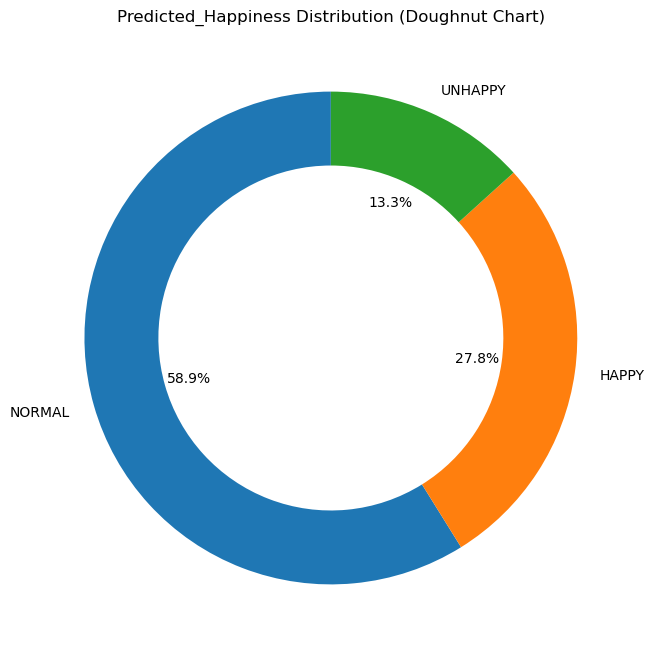

In [21]:
# Calculating the distribution of predicted happiness categories
happiness_counts = data['Predicted_Happiness'].value_counts()

# Extracting the unique happiness categories and their corresponding counts
happiness_categories = happiness_counts.index
happiness_counts_values = happiness_counts.values

# Plotting a doughnut chart to visualize the distribution
plt.figure(figsize=(8, 8))

# Outer ring (pie chart)
plt.pie(happiness_counts_values, labels=happiness_categories, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Inner white circle to create the doughnut effect
centre_circle = plt.Circle((0, 0), 0.2, color='white', edgecolor='black', linewidth=0.8)
plt.gca().add_artist(centre_circle)

# Customizing the plot
plt.title('Predicted_Happiness Distribution (Doughnut Chart)')
plt.show()

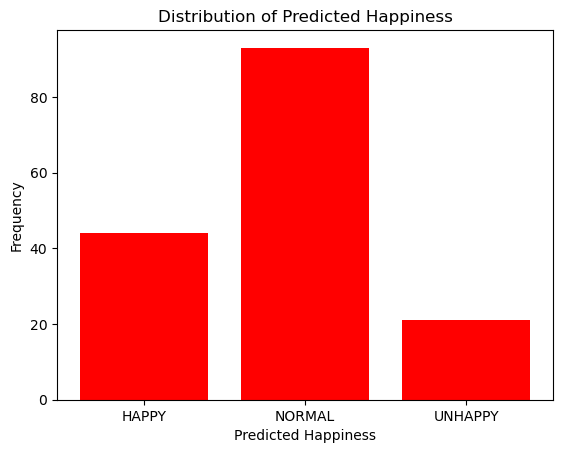

In [22]:
# Extracting data from the DataFrame
countries = data['Country']  # Extracting the 'Country' column
predicted_happiness = data['Predicted_Happiness']  # Extracting the 'Predicted_Happiness' column

# Counting the occurrences of each predicted happiness level
category_counts = {}
for happiness in predicted_happiness:
    if happiness not in category_counts:
        category_counts[happiness] = 0
    category_counts[happiness] += 1

# Preparing the data for plotting
categories = list(category_counts.keys())  # Getting the unique predicted happiness levels
frequencies = list(category_counts.values())  # Getting the count of occurrences for each level

# Plotting the histogram
plt.bar(categories, frequencies, color='red')  # Creating a bar plot using the categories and frequencies

# Customizing the plot
plt.xlabel('Predicted Happiness')  # Setting the label for the x-axis
plt.ylabel('Frequency')  # Setting the label for the y-axis
plt.title('Distribution of Predicted Happiness')  # Setting the title of the plot

# Displaying the plot
plt.show()  # Showing the histogram plot

Upon examining both the doughnut plot and the bar plot, it becomes evident that the category 'Normal Country' has the highest frequency. This observation is derived from the distribution of predicted happiness levels, with the bar plot visually representing the count of 'Normal Country' occurrences as the highest among the categories.

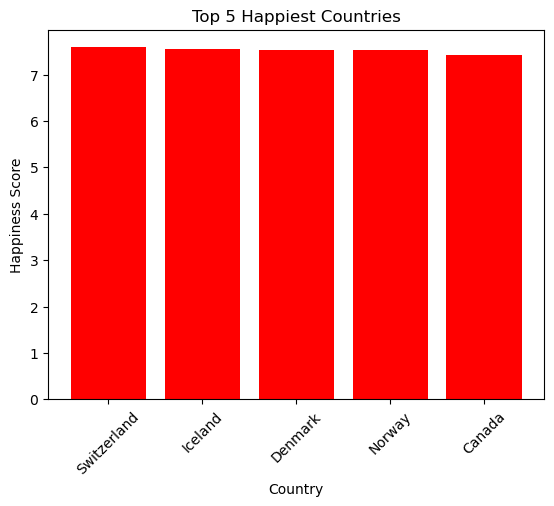

In [23]:
# Sorting the data to get the top 5 happiest countries
top_5_countries = data.sort_values('Happiness_Score', ascending=False).head(5)

# Creating a bar plot with red bars
plt.bar(top_5_countries['Country'], top_5_countries['Happiness_Score'], color='red')

# Customizing the plot
plt.xlabel('Country')  # Setting the label for the x-axis
plt.ylabel('Happiness Score')  # Setting the label for the y-axis
plt.title('Top 5 Happiest Countries')  # Setting the title of the plot
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability

# Displaying the plot
plt.show()  # Showing the bar plot of the top 5 happiest countries

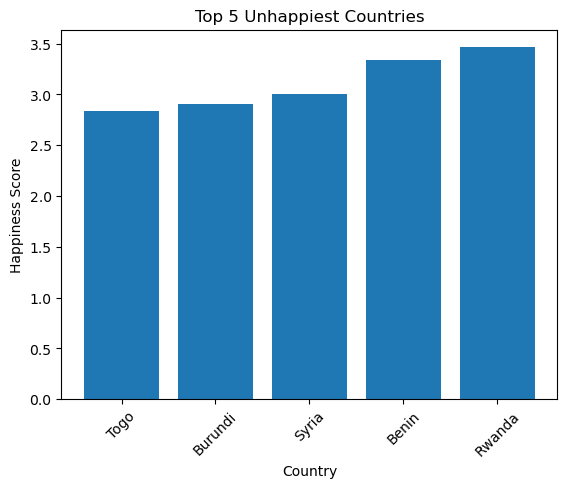

In [24]:
# Sorting the data to get the top 5 unhappiest countries
top_5_countries = data.sort_values('Happiness_Score', ascending=True).head(5)

# Creating a bar plot for the unhappiest countries
plt.bar(top_5_countries['Country'], top_5_countries['Happiness_Score'])

# Customiinge the plot
plt.xlabel('Country')  # Setting the label for the x-axis
plt.ylabel('Happiness Score')  # Setting the label for the y-axis
plt.title('Top 5 Unhappiest Countries')  # Setting the title of the plot
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability

# Displaying the plot
plt.show()  # Showing the bar plot of the top 5 unhappiest countries

# DROPPING IRRELEVANT COLUMNS FOR OPTIMAL LABEL PREDICTION

To enhance label prediction accuracy, extraneous columns are being removed from the dataset. This process involves dropping columns that do not significantly contribute to the predictive model.

In [25]:
# DROPPING IRRELEVANT COLUMNS
# Remove 'Country', 'Region', 'Happiness_Rank', and 'Predicted_Happiness' columns from the dataset
# These columns are dropped as they are not contributing towards the label prediction

data = data.drop(['Country', 'Region', 'Happiness_Rank', 'Predicted_Happiness'], axis=1)

In [26]:
data.head(5)

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176



Upon cleaning the dataset, categorical columns 'Country', 'Predicted_Happiness', and 'Region' were successfully removed, streamlining the data for numerical analysis. Additionally, the 'Happiness_Rank' column, representing sequential numeric data without meaningful information, was successfully dropped. This cleaning process enhances the dataset for more focused and effective observations.

# EXTRACTING HISTOGRAM INFORMATION FOR SKEWNESS ANALYSIS

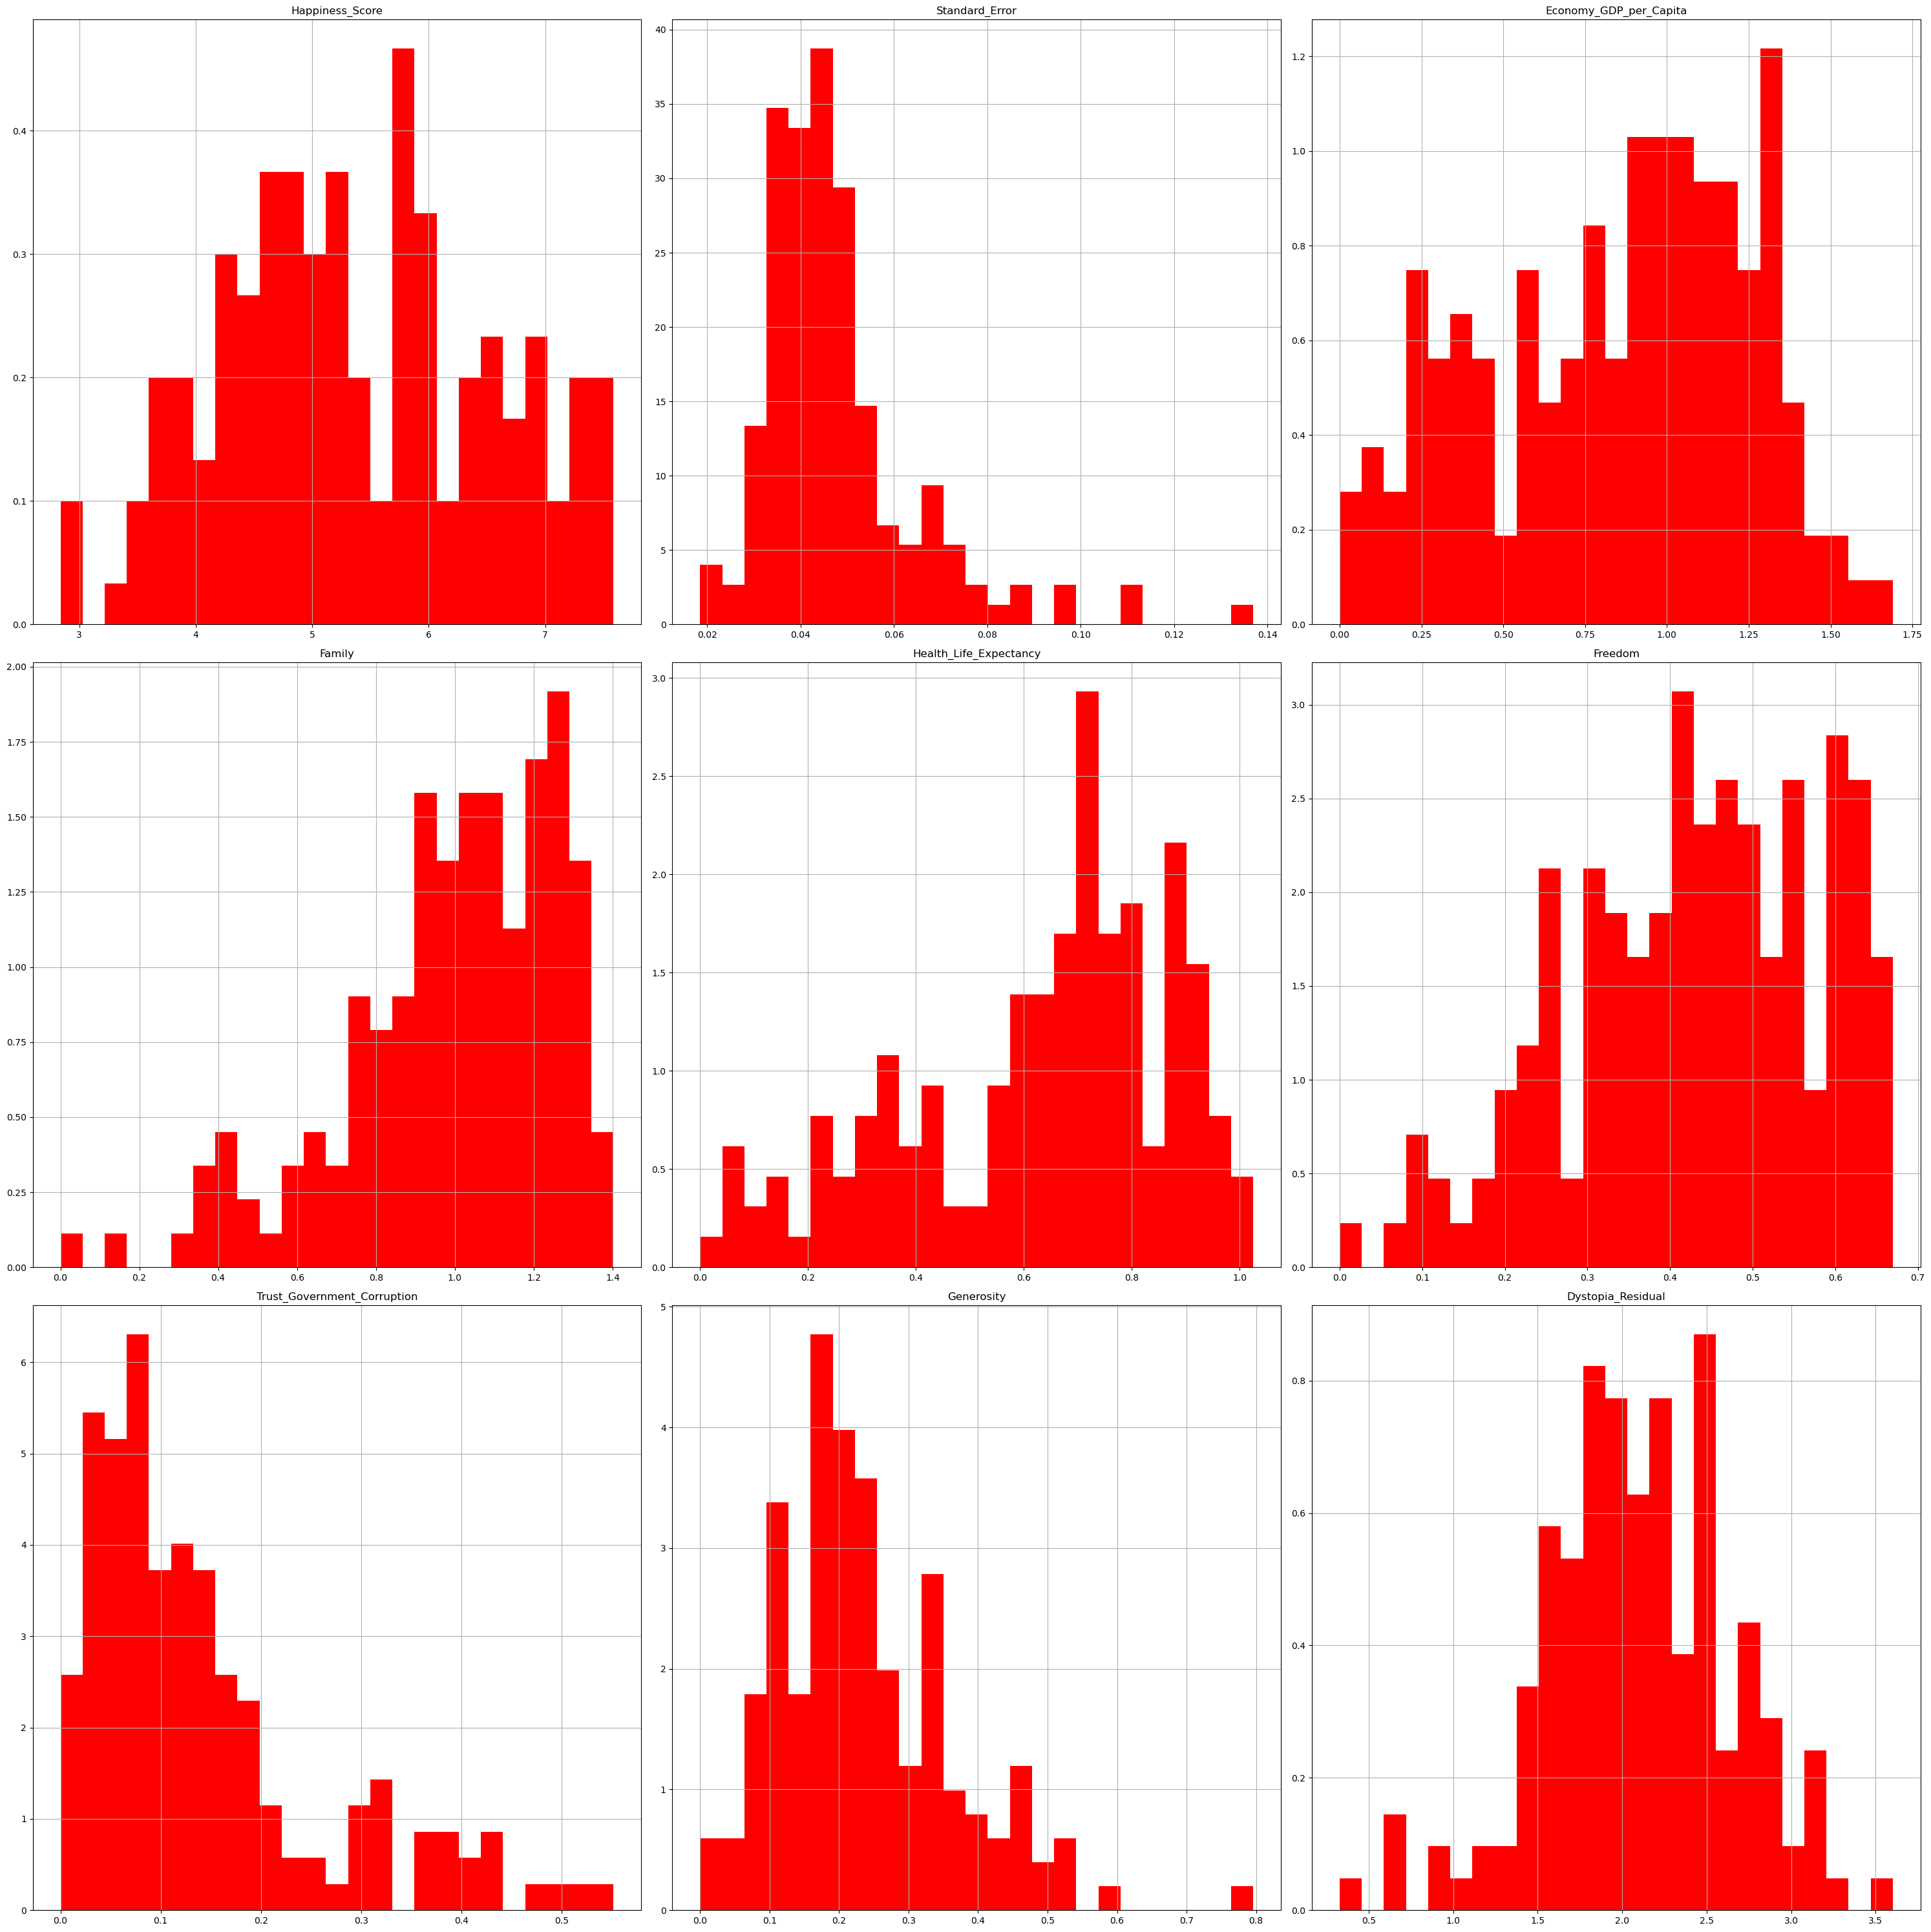

In [27]:
# ADJUSTING PLOTTING PARAMETERS
plt.rcParams['figure.figsize'] = (30, 30)

# Create histograms with red bars, density normalization, and specified parameters
data.hist(bins=25, color='red', density=True, label='Value', histtype='bar')

# Ensure tight layout for improved visual appearance
plt.tight_layout()

# Display the histograms
plt.show()

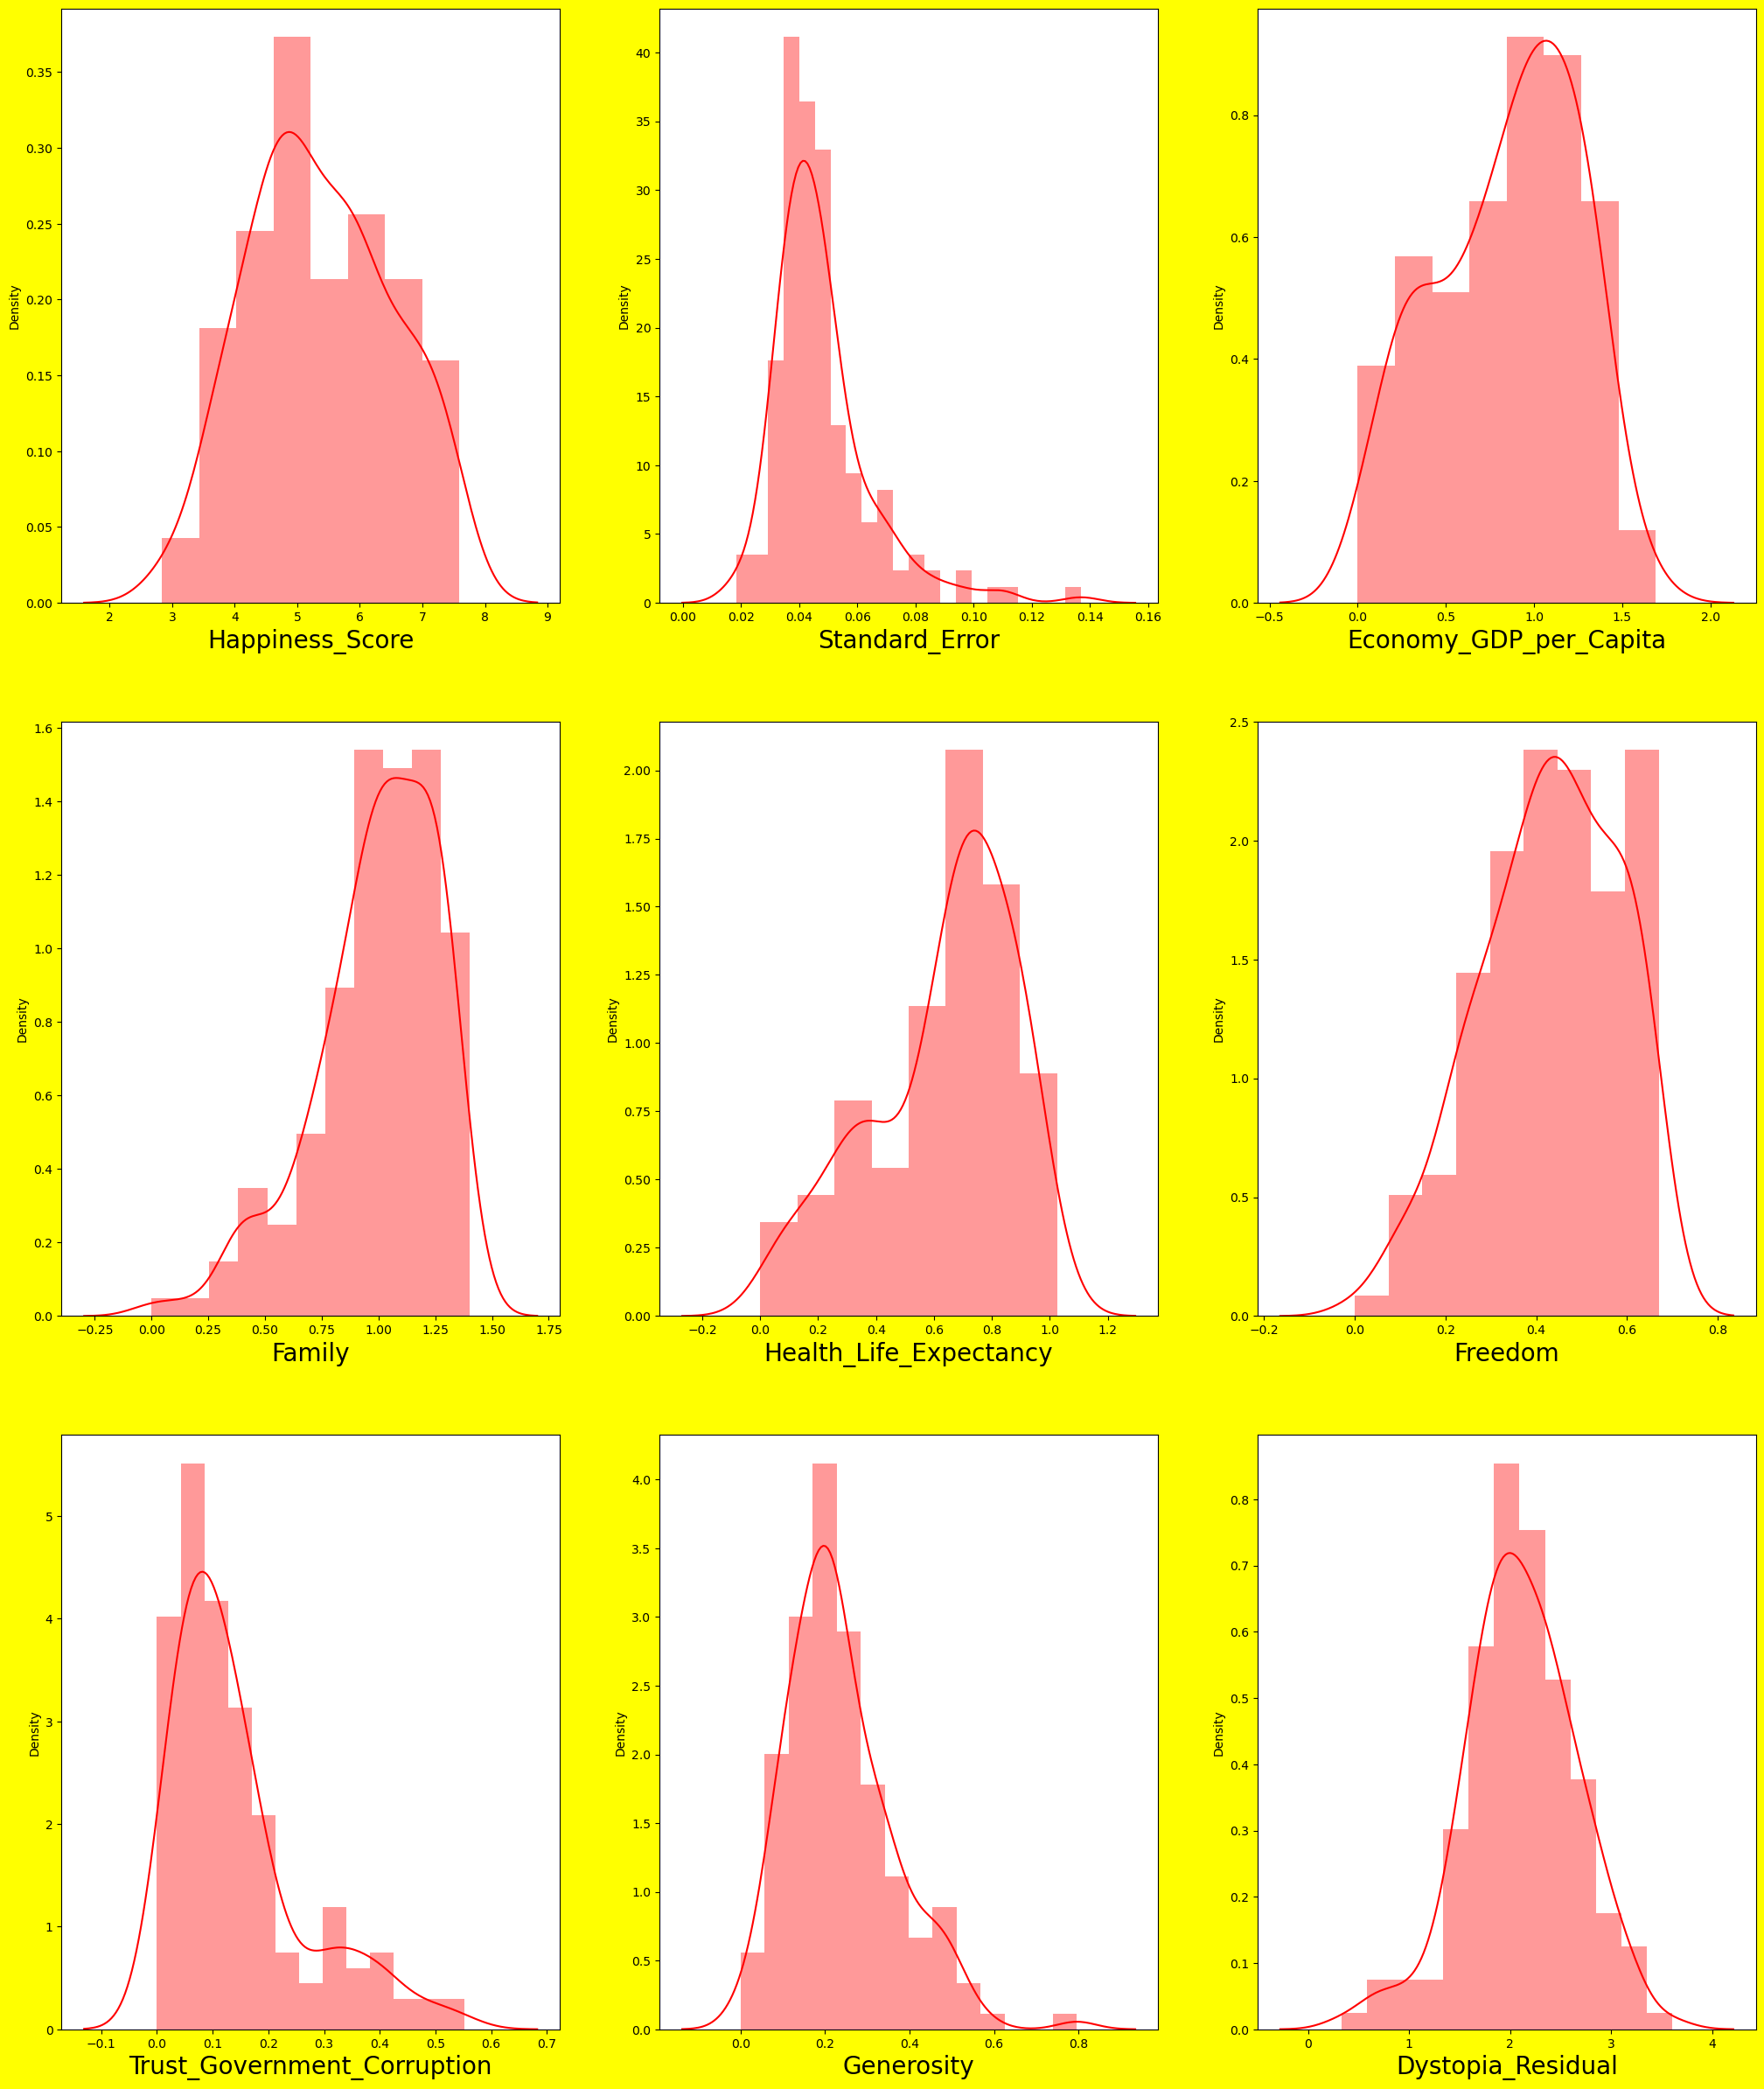

In [28]:
plt.figure(figsize=(25,30), facecolor='yellow')

# Initializing plot number for iterating over columns
plotnumber = 1

# Iterating over each column for distribution visualization
for column in data.columns:
    # Creating subplots for the first 9 columns
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column], color='red')  # Using seaborn distplot for distribution visualization
        plt.xlabel(column, fontsize=20)  # Setting x-axis label with increased font size
    plotnumber += 1

# Displaying the subplots
plt.show()


Upon visual inspection of histograms and distplots, it is evident that certain columns exhibit skewness and deviate from a normal distribution. To confirm these observations numerically, the skew function is applied to the dataset, providing skewness values for each column. The obtained skewness values will aid in the quantitative assessment of the distribution shapes in the dataset.

In [29]:
# CALCULATING SKEWNESS FOR EACH COLUMN IN THE DATASET
data.skew()

Happiness_Score                0.097769
Standard_Error                 1.983439
Economy_GDP_per_Capita        -0.317575
Family                        -1.006893
Health_Life_Expectancy        -0.705328
Freedom                       -0.413462
Trust_Government_Corruption    1.385463
Generosity                     1.001961
Dystopia_Residual             -0.238911
dtype: float64

Observations:
- **Happiness_Score:** The Happiness Score exhibits a relatively low skewness (0.097769), suggesting a nearly symmetric distribution.
- **Standard_Error:** The Standard Error has a considerably high positive skewness (1.983439), indicating a distribution with a longer right tail.
- **Economy_GDP_per_Capita:** The Economy GDP per Capita demonstrates a slight negative skewness (-0.317575), suggesting a distribution with a longer left tail.
- **Family:** The Family column has a significant negative skewness (-1.006893), indicating a distribution with a longer left tail.
- **Health_Life_Expectancy:** The Health Life Expectancy column exhibits a moderate negative skewness (-0.705328).
- **Freedom:** The Freedom column shows a moderate negative skewness (-0.413462).
- **Trust_Government_Corruption:** The Trust in Government Corruption column has a relatively high positive skewness (1.385463), indicating a distribution with a longer right tail.
- **Generosity:** The Generosity column shows positive skewness (1.001961), suggesting a distribution with a longer right tail.
- **Dystopia_Residual:** The Dystopia Residual exhibits a slight negative skewness (-0.238911).

These skewness observations provide insights into the distribution shapes of each feature, aiding in understanding their statistical characteristics.

# VISUALIZING OUTLIERS

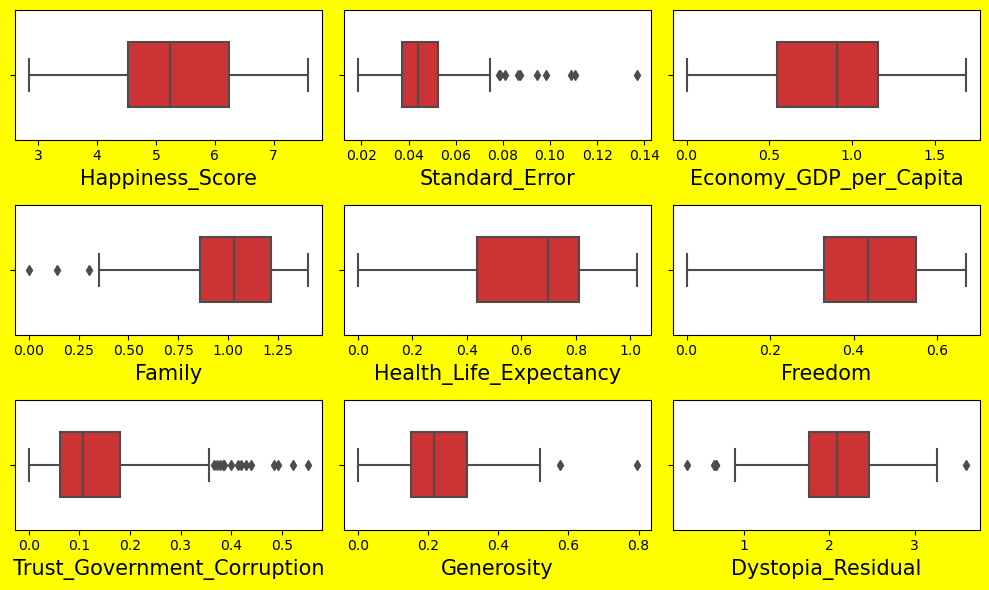

In [30]:
plt.figure(figsize=(10, 6), facecolor='yellow')

# Initializing plot number for iterating over columns
plotnumber = 1

# Iterating over each column for outlier visualization using boxplots
for col in data.columns:
    # Creating subplots for the first 9 columns
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(data[col], palette='Set1', width=0.5)  # Using seaborn boxplot for outlier visualization
        plt.xlabel(col, fontsize=15)  # Setting x-axis label with increased font size

        plt.yticks(rotation=0, fontsize=10)  # Rotating y-axis labels for better readability
    plotnumber += 1

# Ensuring tight layout for improved visual appearance
plt.tight_layout()

# Displaying the subplots
plt.show()

Upon visual inspection of boxplots for each feature, it is evident that certain columns in the dataset contain outliers. Outliers are data points that significantly deviate from the majority of the distribution and may impact the statistical analysis. Identifying and addressing these outliers may be essential for robust data analysis and model building.

# UTILIZING Z-SCORE METHOD FOR OUTLIER DETECTION AND REMOVAL

Utilizing the Z-score method to identify and remove outliers from the dataset. The Z-score measures how many standard deviations a data point is from the mean, allowing for the identification of values significantly different from the average. Removing outliers using the Z-score can enhance the robustness of the dataset for subsequent analysis and modeling.

In [31]:
# Z-SCORE METHOD FOR OUTLIER REMOVAL
# Calculating the absolute Z-scores for each data point in the dataset
z_scores = np.abs(zscore(data))

# Setting the threshold for identifying outliers
threshold = 3

# Identifing the indices of outliers using the Z-score method
outlier_indices = np.where(z_scores > threshold)

# Removing outliers and create a new dataset (data1) without outliers
data1 = data[(z_scores < threshold).all(axis=1)]

# Displaying the dataset without outliers
data1

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328



By applying the Z-score method, outliers in the dataset were successfully identified and subsequently removed. This approach involves calculating the Z-scores for each data point and setting a predefined threshold (here, 3 standard deviations) to identify values significantly deviating from the mean. The resulting dataset, post-outlier removal, is now more robust for further analysis and modeling.

In [32]:
# CALCULATING PERCENTAGE OF DATA LOSS AFTER OUTLIER REMOVAL
original_rows = 158  # Number of rows in the original dataset
rows_after_outlier_removal = 149  # Number of rows after outlier removal

data_loss_percentage = ((original_rows - rows_after_outlier_removal) / original_rows) * 100

# Displaying the percentage of data loss
data_loss_percentage

5.69620253164557

# ASSESSING DATA LOSS PERCENTAGE POST OUTLIER REMOVAL

After successfully removing outliers, the percentage of data loss is determined by comparing the number of rows in the original dataset (158 rows) with the reduced dataset (149 rows) post-outlier removal. This metric provides insight into the impact of outlier removal on the dataset size.

In [33]:
# CALCULATING CORRELATION MATRIX FOR THE CLEANED DATASET
# Displaying the correlation matrix
data1.corr()

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
Happiness_Score,1.000000,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Standard_Error,-0.230252,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy_GDP_per_Capita,0.773577,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.720868,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health_Life_Expectancy,0.729191,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.585066,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust_Government_Corruption,0.477692,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080
Generosity,0.250903,-0.131970,0.020730,0.154011,0.129328,0.428718,0.296450,1.000000,-0.034239
Dystopia_Residual,0.528334,0.045722,0.026936,0.118062,0.031212,0.058596,0.078080,-0.034239,1.000000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

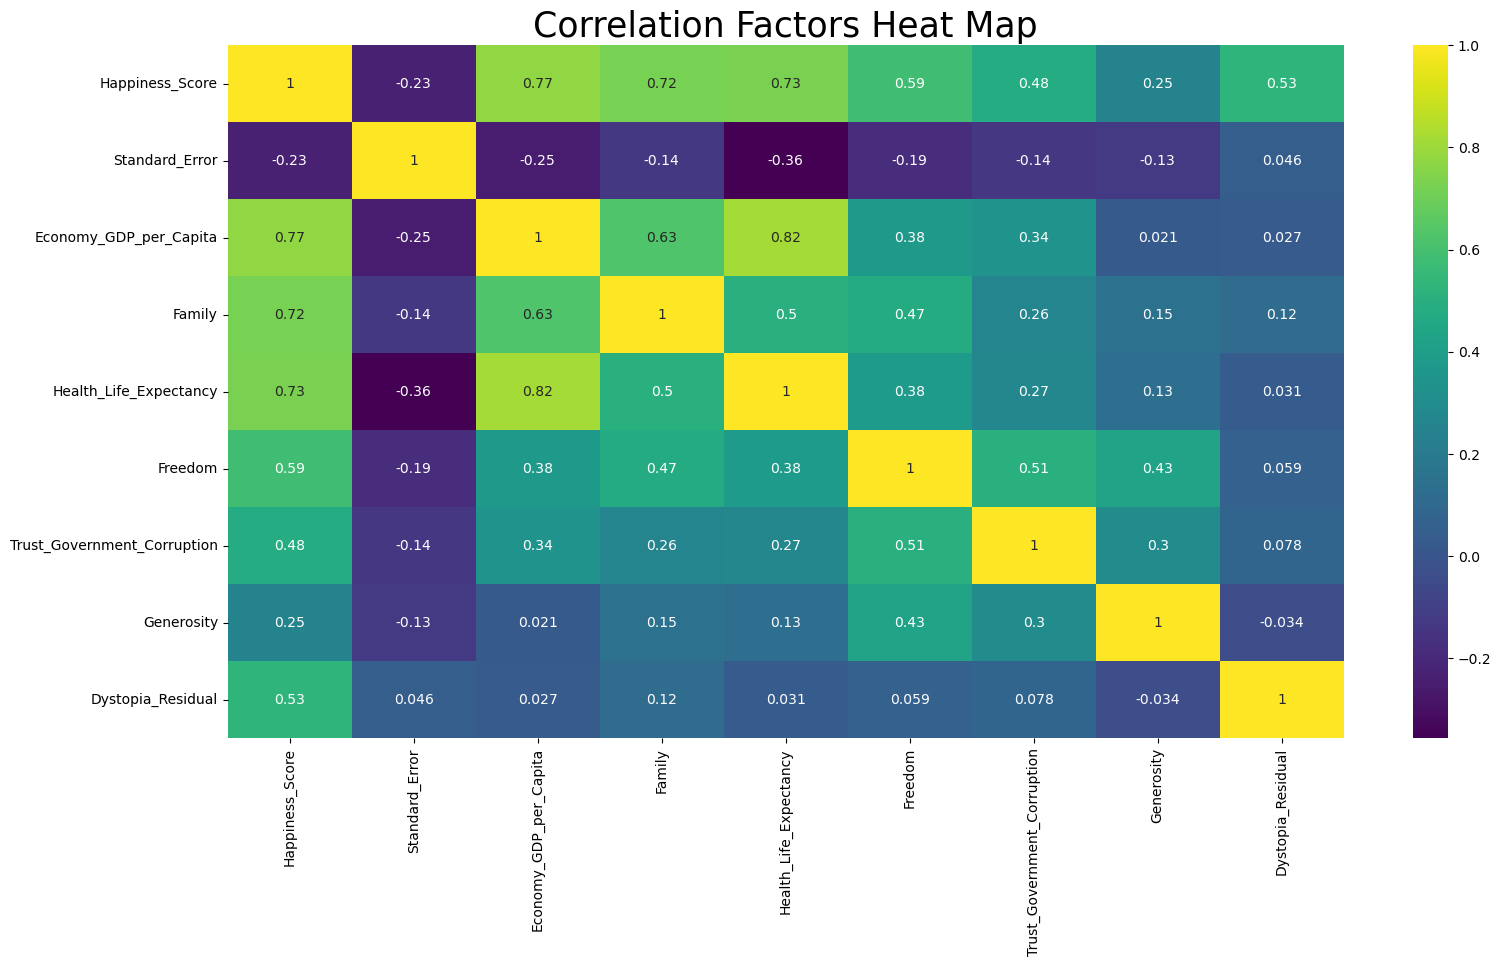

In [34]:
# VISUALIZING CORRELATION MATRIX WITH HEATMAP
# Setting the figure size for the heatmap
plt.figure(figsize=(18, 9))

# Creating a heatmap of the correlation matrix with annotated values
sns.heatmap(data1.corr(), annot=True, cmap='viridis').set_title('Correlation Factors Heat Map', size='25')

<AxesSubplot:>

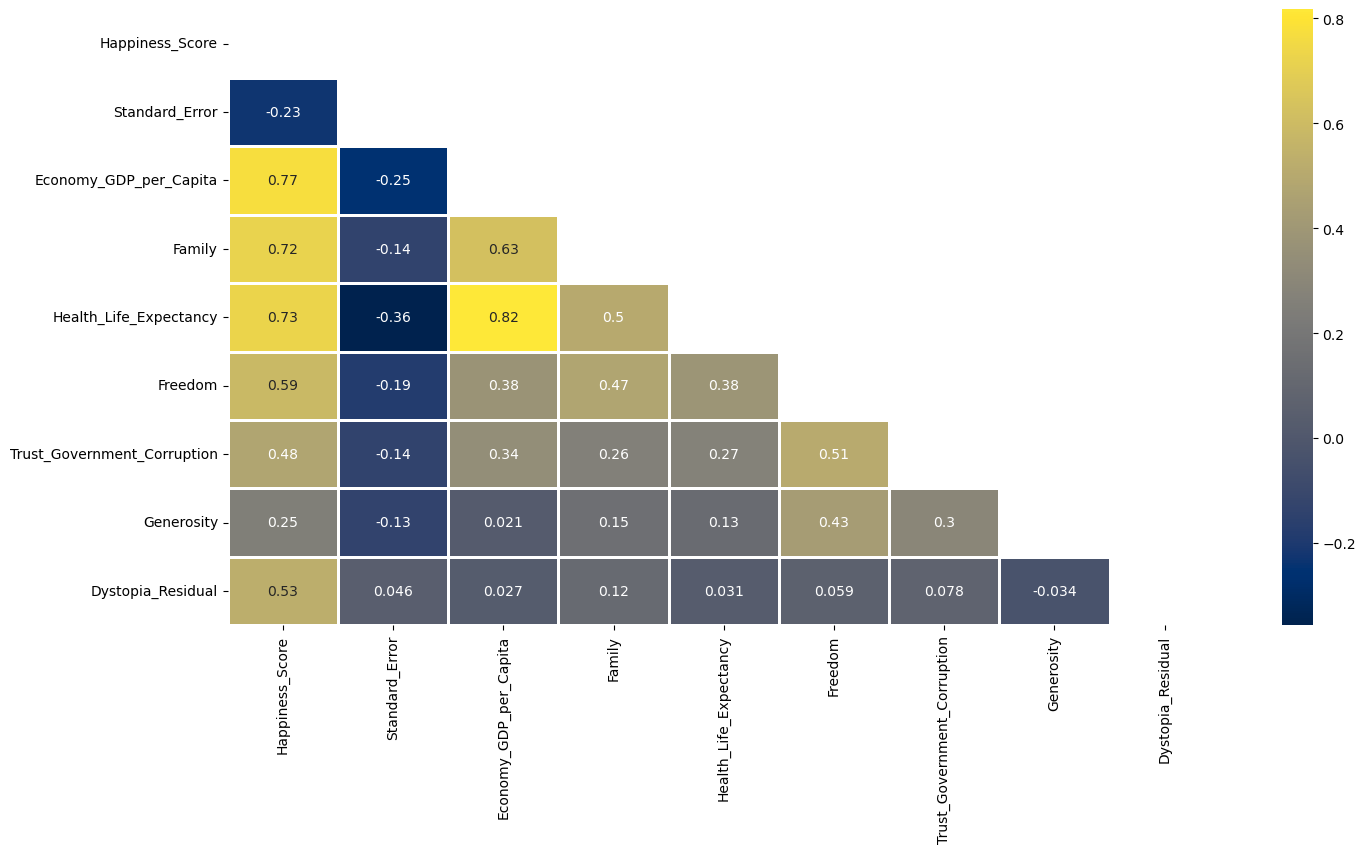

In [35]:
# VISUALIZING CORRELATION MATRIX WITH HEATMAP AND TRIANGULAR MASK
# Setting the figure size for the heatmap
plt.figure(figsize=(16,8))

# Creating a triangular mask for the upper part of the heatmap
matrix = np.triu(data1.corr())

# Creating a heatmap of the correlation matrix with annotated values and the triangular mask
sns.heatmap(data1.corr(), annot=True, linewidth=0.9, mask=matrix, cmap="cividis")


In [36]:
# Displaying the absolute correlation values with the 'Happiness_Score' in descending order
correlation_with_label = data1.corr()['Happiness_Score'].abs().sort_values(ascending=False)
print(correlation_with_label)

Happiness_Score                1.000000
Economy_GDP_per_Capita         0.773577
Health_Life_Expectancy         0.729191
Family                         0.720868
Freedom                        0.585066
Dystopia_Residual              0.528334
Trust_Government_Corruption    0.477692
Generosity                     0.250903
Standard_Error                 0.230252
Name: Happiness_Score, dtype: float64


Observations:
- **Economy_GDP_per_Capita:** Demonstrates a strong positive correlation (0.773577) with 'Happiness_Score', indicating that higher economic factors are associated with increased happiness.
- **Health_Life_Expectancy:** Shows a substantial positive correlation (0.729191) with 'Happiness_Score', suggesting that improved health and life expectancy contribute significantly to happiness.
- **Family:** Exhibits a strong positive correlation (0.720868) with 'Happiness_Score', emphasizing the importance of family in happiness assessment.
- **Freedom:** Displays a moderate positive correlation (0.585066) with 'Happiness_Score', indicating that a sense of freedom contributes positively to happiness.
- **Dystopia_Residual:** Shows a moderate positive correlation (0.528334) with 'Happiness_Score', suggesting that the residual measure of dystopia contributes to happiness assessment.
- **Trust_Government_Corruption:** Displays a moderate positive correlation (0.477692) with 'Happiness_Score', indicating that trust in government and lower corruption positively impact happiness.
- **Generosity:** Exhibits a positive correlation (0.250903) with 'Happiness_Score', although it is relatively weaker compared to other factors.
- **Standard_Error:** Shows a relatively weak positive correlation (0.230252) with 'Happiness_Score', suggesting a minor impact on happiness.
  
These observations provide insights into the factors that strongly influence happiness as measured by the 'Happiness_Score'.


# EVALUATING FEATURE-TO-FEATURE CORRELATIONS

Examining the correlations between different features within the dataset offers valuable insights into their interrelationships, providing a comprehensive view of the internal dynamics.

In [37]:
# IDENTIFYING HIGHLY CORRELATED FEATURES FOR POTENTIAL DROP
# Calculating the correlation matrix for the cleaned dataset (data1)
df_corr = data1.corr()

# Setting the correlation threshold
correlation_threshold = 0.8

# Creating a mask for features with absolute correlation values greater than or equal to the threshold
mask = df_corr.abs() >= correlation_threshold

# Initializing a set to store features to be dropped
features_to_drop = set()

# Iterating over the upper triangular part of the correlation matrix
for i in range(len(df_corr.columns)):
    for j in range(i + 1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            # Adding features to the set only if not already marked for drop
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [38]:
# SET OF FEATURES TO BE DROPPED DUE TO HIGH CORRELATION
features_to_drop

{'Health_Life_Expectancy'}


The analysis reveals a strong correlation (more than 80%) between 'Health_Life_Expectancy' and 'Economy_GDP_per_Capita'. To mitigate multicollinearity and streamline the dataset, the decision is made to drop 'Health_Life_Expectancy'.


In [39]:
# DROPPING FEATURE WITH HIGH CORRELATION
data1 = data1.drop(['Health_Life_Expectancy'], axis=1)

In [40]:
# DISPLAYING THE FIRST FIVE ROWS OF THE CLEANED DATASET
data1.head(5)

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176


# SPLITTING INTO FEATURES AND LABEL

In [41]:
# SPLITTING INTO FEATURES AND LABEL
# 'X' represents the features, excluding the 'Happiness_Score' column
X = data1.drop('Happiness_Score', axis=1)

# 'y' represents the label, containing the 'Happiness_Score' column
y = data1['Happiness_Score']

In [42]:
X

,Standard_Error,Economy_GDP_per_Capita,Family,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328


In [43]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness_Score, Length: 149, dtype: float64

# STANDARDIZING NUMERICAL FEATURES USING STANDARDSCALER

In [44]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Transforming and standardizing the numerical features in 'X'
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [45]:
X

,Standard_Error,Economy_GDP_per_Capita,Family,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,-0.866786,1.381916,1.357879,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,0.379439,-0.533653,-0.409226,-0.930702


# DETERMINING OPTIMAL RANDOM STATE

In [46]:
# FINDING THE OPTIMAL RANDOM STATE FOR GRADIENT BOOSTING REGRESSOR
# Iterating through a range of random states to identify the one yielding the highest R2 score

# Initializing variables to track the maximum R2 score and its corresponding random state
maxR2_score = 0
maxRS = 0

# Iterating through a range of random states
for i in range(1, 200):
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    
    # Initializing the GradientBoostingRegressor model
    gb = GradientBoostingRegressor(n_estimators=100)
    # Training the model on the training set
    gb.fit(X_train, y_train)
    
    # Making predictions on the test set
    y_pred = gb.predict(X_test)
    
    # Calculating the R2 score for the current random state
    R2 = r2_score(y_test, y_pred)
    
    # Updating the maximum R2 score and corresponding random state if a higher score is obtained
    if R2 > maxR2_score:
        maxR2_score = R2
        maxRS = i

# Displaying the best accuracy and its corresponding random state
print('Best accuracy is', maxR2_score, 'on Random_state', maxRS)

Best accuracy is 0.962736070623466 on Random_state 23


# SPLITTING DATASET INTO TRAINING AND TESTING SETS

In [47]:
# Assigning the resulting splits to variables for further use
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# LINEAR REGRESSION MODEL

In [48]:
# LINEAR REGRESSION MODEL FITTING AND PREDICTIONS
# Creating a Linear Regression model, fitting it to the training data, and making predictions on the test set

# Initializing the Linear Regression model
LR = LinearRegression()

# Fitting the model to the training data
LR.fit(X_train, y_train)

# Making predictions on the test set
y_pred = LR.predict(X_test)

# Evaluating the model performance using R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.977028987088247
MAE: 0.11840451349002025


With an R2 score of 97.70%, there is a strong indication that the Linear Regression model might be overfitted to the training data. Such a high accuracy on the test set raises concerns about the model's generalization to new, unseen data. Further analysis and potential model regularization may be warranted to address overfitting and enhance robustness.

# VISUALIZING BEST-FIT LINE FOR LINEAR REGRESSION

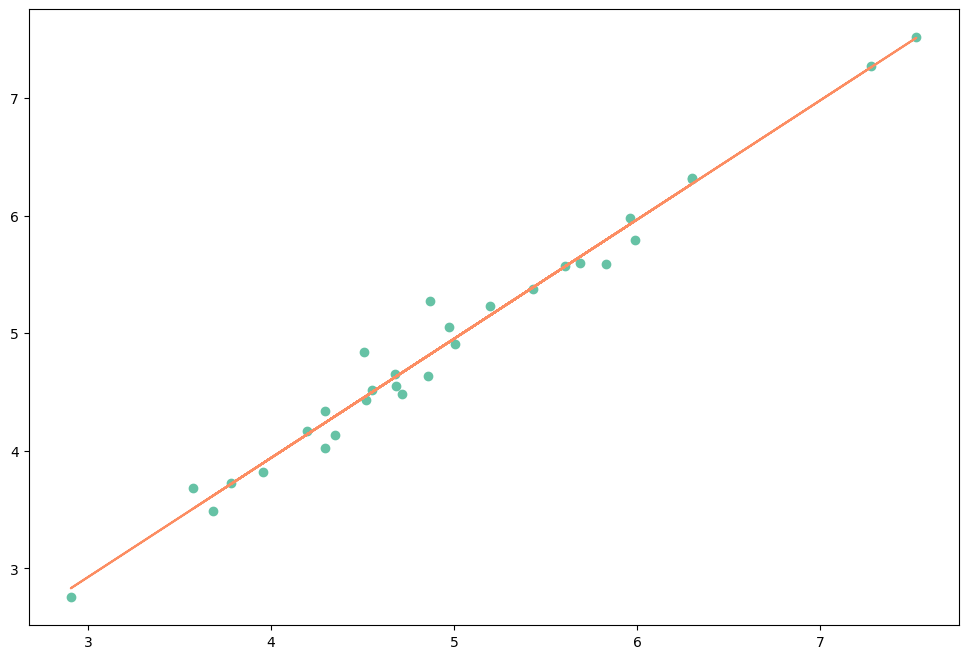

In [49]:
# Setting the figure size
plt.rcParams['figure.figsize'] = (12,8)

# Changing color palette to Set2
palette = "Set2"
sns.set_palette(palette)

# Plotting actual vs. predicted values
plt.plot(y_test, y_pred, 'o')

# Calculating the best-fit line parameters
m, b = np.polyfit(y_test, y_pred, 1)

# Plotting the best-fit line
plt.plot(y_test, m * y_test + b)

# Displaying the plot
plt.show()

# DECISION TREE REGRESSOR MODEL

In [50]:
# Initializing the Decision Tree Regressor model with a specified maximum depth
DT = DecisionTreeRegressor(max_depth=5)

# Fitting the model to the training data
DT.fit(X_train, y_train)

# Making predictions on the test set
y_pred = DT.predict(X_test)

# Evaluating the model performance using R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.719847471094097
MAE: 0.45498603703703705


The R2 score of 0.7198 indicates a good fit, capturing about 71.98% of the variance in the target variable.
The Mean Absolute Error (MAE) of 0.455 suggests that, on average, the predicted values deviate by approximately 0.455 units from the actual values.These metrics provide insights into the model's performance, with room for improvement or fine-tuning if needed.

# VISUALIZING BEST-FIT LINE FOR DECISION TREE REGRESSOR MODEL

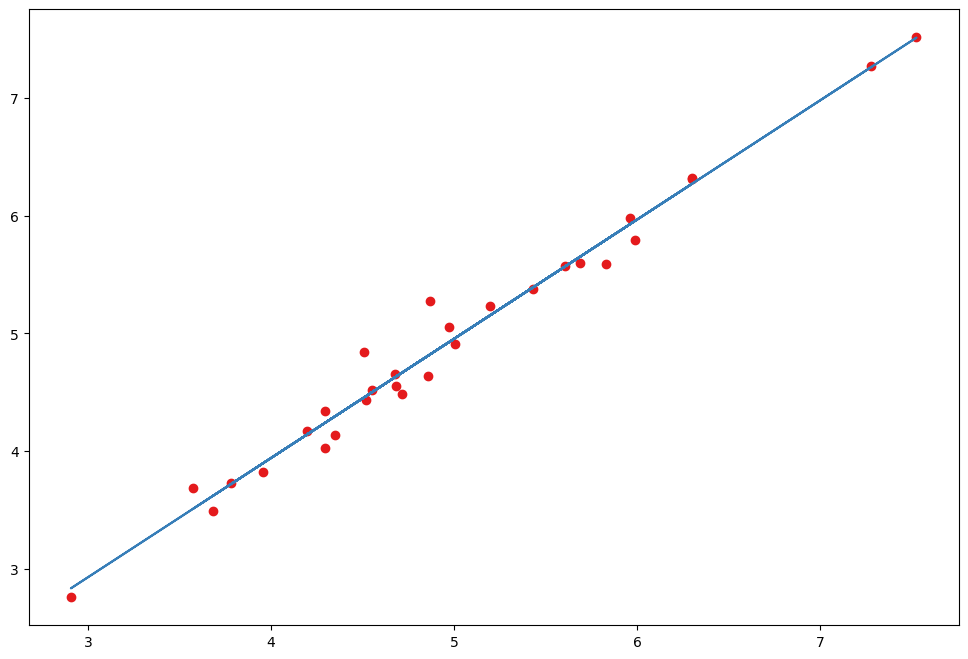

In [54]:
# Setting the figure size
plt.rcParams['figure.figsize'] = (12,8)

# Changing color palette to Set1
palette = "Set1"
sns.set_palette(palette)

# Plotting actual vs. predicted values
plt.plot(y_test, y_pred, 'o')

# Calculating the best-fit line parameters
m, b = np.polyfit(y_test, y_pred, 1)

# Plotting the best-fit line
plt.plot(y_test, m * y_test + b)

# Displaying the plot
plt.show()

# LASSO REGRESSION MODEL

In [55]:
# Initializing the Lasso Regression model with a specified alpha value
L = Lasso(alpha=0.001)

# Fitting the model to the training data
L.fit(X_train, y_train)

# Making predictions on the test set
y_pred = L.predict(X_test)

# Evaluating the model performance using R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9772055246867738
MAE: 0.1175203837431278


HIGH R2 SCORE INDICATING POSSIBLE OVERFITTING
The R2 score of 97.72% on the test set suggests potential overfitting of the Lasso Regression model.
Further analysis or regularization adjustments may be needed to address overfitting concerns.

# VISUALIZING LASSO REGRESSION MODEL

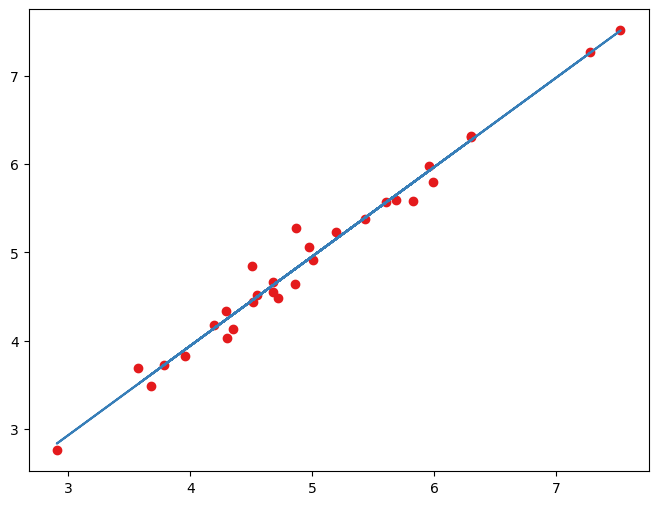

In [56]:
# Setting the figure size
plt.rcParams['figure.figsize'] = (8, 6)

# Changing color palette to Set1
palette = "Set1"
sns.set_palette(palette)

# Plotting actual vs. predicted values
plt.plot(y_test, y_pred, 'o')

# Calculating the best-fit line parameters
m, b = np.polyfit(y_test, y_pred, 1)

# Plotting the best-fit line
plt.plot(y_test, m * y_test + b)

# Displaying the plot
plt.show()

# RIDGE REGRESSION MODEL

In [57]:
# Initializing the Ridge Regression model with a specified alpha value
R = Ridge(alpha=10)

# Fitting the model to the training data
R.fit(X_train, y_train)

# Making predictions on the test set
y_pred = R.predict(X_test)

# Evaluating the model performance using R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9808651285156372
MAE: 0.10693439605933606


The Ridge Regression model demonstrates strong performance with an R2 score of 0.9809, indicating an excellent fit.
The low Mean Absolute Error (MAE) of 0.1069 suggests that, on average, the predicted values deviate by approximately 0.107 units from the actual values.
These results indicate a well-fitted model, capturing a high percentage of the variance in the target variable with minimal prediction errors.

# VISUALIZING RIDGE REGRESSION MODEL

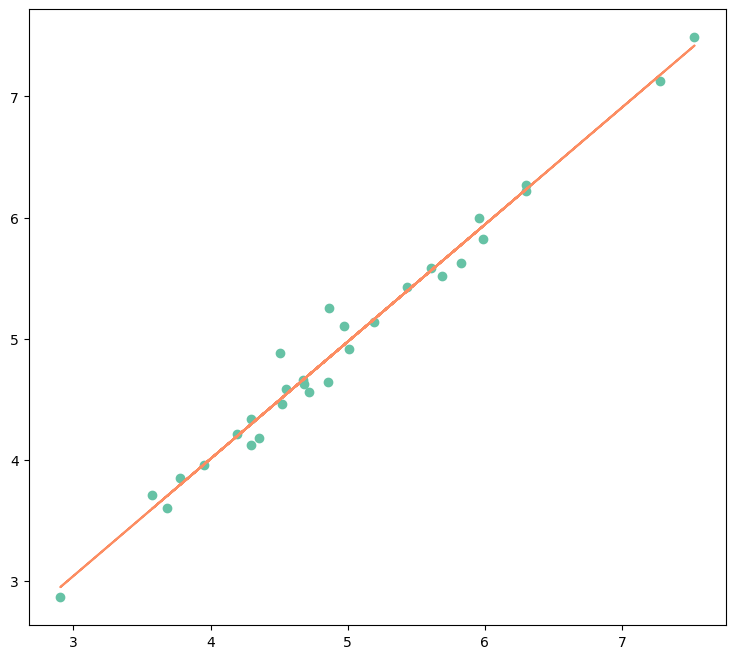

In [58]:
# Setting the figure size
plt.rcParams['figure.figsize'] = (9,8)

# Changing color palette to Set2
palette = "Set2"
sns.set_palette(palette)

# Plotting actual vs. predicted values
plt.plot(y_test, y_pred, 'o')

# Calculating the best-fit line parameters
m, b = np.polyfit(y_test, y_pred, 1)

# Plotting the best-fit line
plt.plot(y_test, m * y_test + b)

# Displaying the plot
plt.show()

# RANDOM FOREST REGRESSOR MODEL

In [59]:
# Initializing the Random Forest Regressor model with hyperparameters
RF = RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.75,
                            max_features=0.75,
                            max_depth=10)

# Fitting the model to the training data
RF.fit(X_train, y_train)

# Making predictions on the test set
y_pred = RF.predict(X_test)

# Evaluating the model performance using R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8639502487024552
MAE: 0.3028976791005297


The Random Forest Regressor model shows strong performance with an R2 score of 0.864, indicating a good fit.
The Mean Absolute Error (MAE) of 0.303 suggests that, on average, the predicted values deviate by approximately 0.303 units from the actual values.These results indicate a well-fitted model with a high percentage of variance captured and relatively low prediction errors.

# VISUALIZING RANDOM FOREST REGRESSOR MODEL

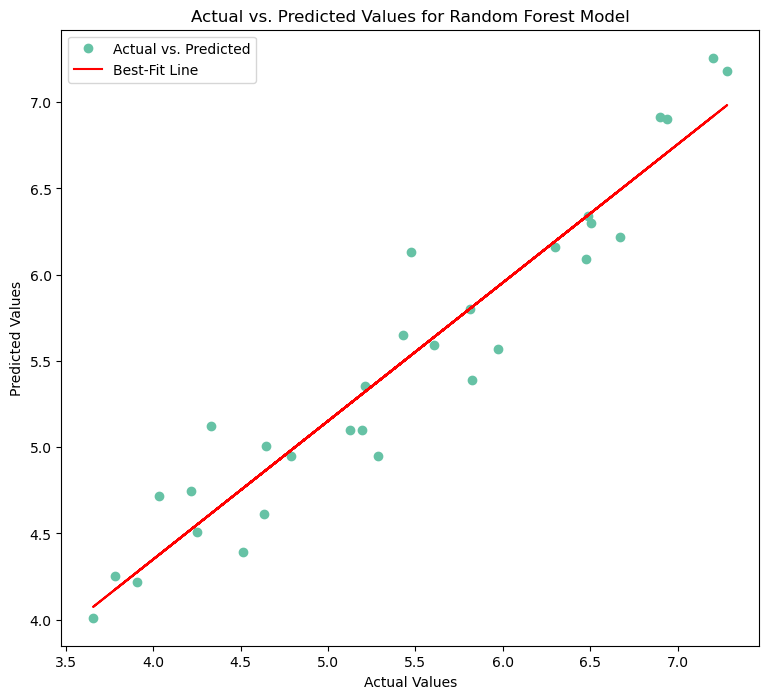

In [92]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Setting the figure size
plt.rcParams['figure.figsize'] = (9, 8)

# Changing color palette to Set2
palette = "Set2"
sns.set_palette(palette)

# Plotting actual vs. predicted values
plt.plot(y_test, y_pred, 'o', label='Actual vs. Predicted')

# Calculating the best-fit line parameters
m, b = np.polyfit(y_test, y_pred, 1)

# Plotting the best-fit line
plt.plot(y_test, m * y_test + b, label='Best-Fit Line', color='red')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Random Forest Model')

# Displaying the legend
plt.legend()

# Displaying the plot
plt.show()

# GRADIENT BOOSTING REGRESSOR MODEL

In [65]:
# Initializing the Gradient Boosting Regressor model with n_estimators=100
GB = GradientBoostingRegressor(n_estimators=100)

# Fitting the model to the training data
GB.fit(X_train, y_train)

# Making predictions on the test set
y_pred = GB.predict(X_test)

# Evaluating the model performance using R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9479715951871739
MAE: 0.1860691353698746


The Gradient Boosting Regressor model demonstrates excellent performance with an R2 score of 0.948, indicating a high degree of fit.The Mean Absolute Error (MAE) of 0.186 suggests that, on average, the predicted values deviate by approximately 0.186 units from the actual values.These results indicate a well-fitted model with a strong ability to capture the variance in the target variable and low prediction errors.

# VISUALIZING FOR GRADIENT BOOSTING REGRESSOR MODEL

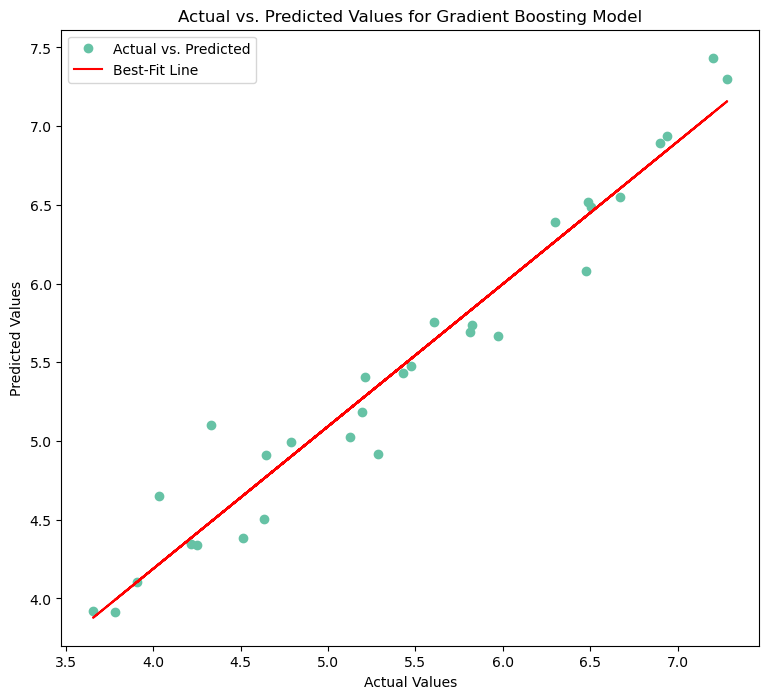

In [93]:
# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Setting the figure size
plt.rcParams['figure.figsize'] = (9, 8)

# Changing color palette to Set2
palette = "Set2"
sns.set_palette(palette)

# Plotting actual vs. predicted values
plt.plot(y_test, y_pred, 'o', label='Actual vs. Predicted')

# Calculating the best-fit line parameters
m, b = np.polyfit(y_test, y_pred, 1)

# Plotting the best-fit line
plt.plot(y_test, m * y_test + b, label='Best-Fit Line', color='red')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Gradient Boosting Model')

# Displaying the legend
plt.legend()

# Displaying the plot
plt.show()

# EXTRA TREE REGRESSOR MODEL

In [67]:
# Initializing the Extra Tree Regressor model with specified hyperparameters
ET = ExtraTreesRegressor(n_estimators=100,
                         random_state=3,
                         max_samples=0.5,
                         max_features=0.75,
                         max_depth=10,
                         bootstrap=True)

# Fitting the model to the training data
ET.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ET.predict(X_test)

# Evaluating the model performance using R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.861391711250951
MAE: 0.30412815277777816


The Extra Tree Regressor model exhibits strong performance with an R2 score of 0.861, indicating a good fit to the data.The Mean Absolute Error (MAE) of 0.304 suggests that, on average, the predicted values deviate by approximately 0.304 units from the actual values.These results indicate a well-fitted model with a high percentage of variance captured and relatively low prediction errors.

# VISUALIZING EXTRA TREE REGRESSOR MODEL

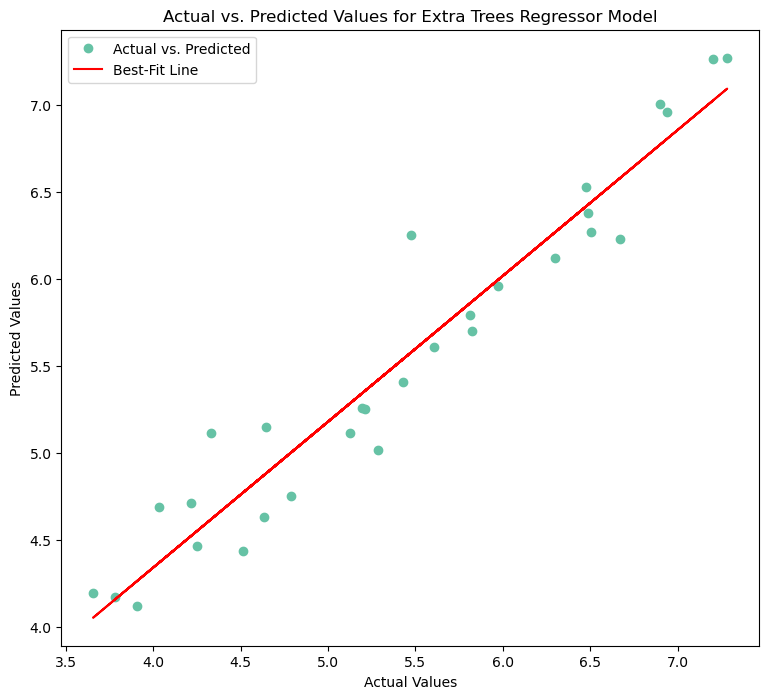

In [94]:
# Train an Extra Trees Regressor model
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = et_model.predict(X_test)

# Setting the figure size
plt.rcParams['figure.figsize'] = (9, 8)

# Changing color palette to Set2
palette = "Set2"
sns.set_palette(palette)

# Plotting actual vs. predicted values
plt.plot(y_test, y_pred, 'o', label='Actual vs. Predicted')

# Calculating the best-fit line parameters
m, b = np.polyfit(y_test, y_pred, 1)

# Plotting the best-fit line
plt.plot(y_test, m * y_test + b, label='Best-Fit Line', color='red')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Extra Trees Regressor Model')

# Displaying the legend
plt.legend()

# Displaying the plot
plt.show()

# ADA BOOST REGRESSOR MODEL

In [69]:
# Initializing the Ada Boost Regressor model with specified hyperparameters
AB = AdaBoostRegressor(n_estimators=100, learning_rate=1.0)

# Fitting the model to the training data
AB.fit(X_train, y_train)

# Making predictions on the test set
y_pred = AB.predict(X_test)

# Evaluating the model performance using R2 score and Mean Absolute Error (MAE)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8409062164426399
MAE: 0.33094477153481505


The Ada Boost Regressor model displays strong performance with an R2 score of 0.841, indicating a good fit to the data.The Mean Absolute Error (MAE) of 0.331 suggests that, on average, the predicted values deviate by approximately 0.331 units from the actual values.These results indicate a well-fitted model with a relatively high percentage of variance captured and moderate prediction errors.

# VISUALIZING ADA BOOST REGRESSOR MODEL

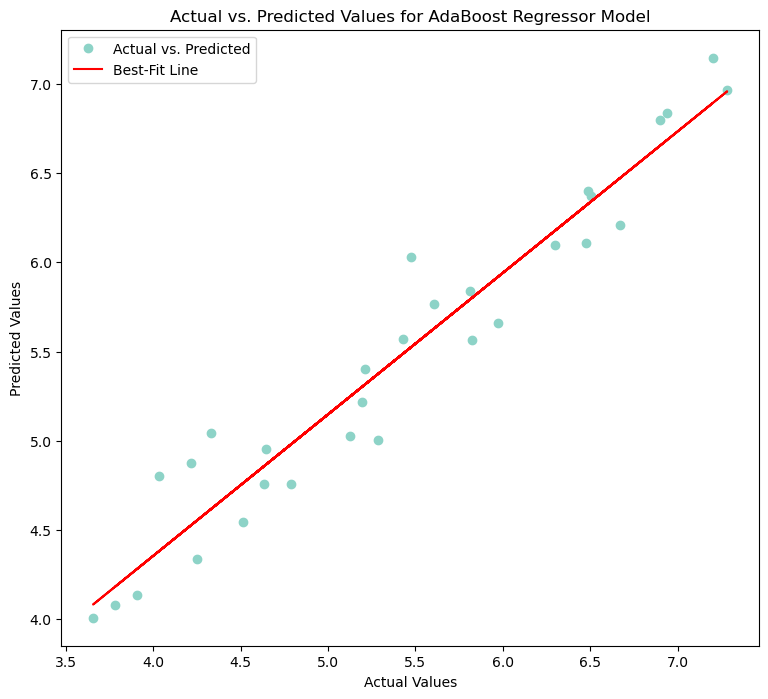

In [96]:
# Train an AdaBoost Regressor model
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Setting the figure size
plt.rcParams['figure.figsize'] = (9, 8)

# Changing color palette to Set3
palette = "Set3"
sns.set_palette(palette)

# Plotting actual vs. predicted values
plt.plot(y_test, y_pred, 'o', label='Actual vs. Predicted')

# Calculating the best-fit line parameters
m, b = np.polyfit(y_test, y_pred, 1)

# Plotting the best-fit line
plt.plot(y_test, m * y_test + b, label='Best-Fit Line', color='red')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for AdaBoost Regressor Model')

# Displaying the legend
plt.legend()

# Displaying the plot
plt.show()

**CONCLUSION:**
Based on the evaluation of different regression models, it is observed that 'Linear Regression', 'Lasso', and 'Ridge' models exhibit signs of overfitting.The 'Gradient Boosting' model, on the other hand, demonstrates the best overall performance with a high R2 score and low MAE.
Therefore, **the 'Gradient Boosting' model is selected as the best model for further predictions, and it will be saved for future use.**

# FEATURE IMPORTANCE ANALYSIS USING GRADIENT BOOSTING MODEL

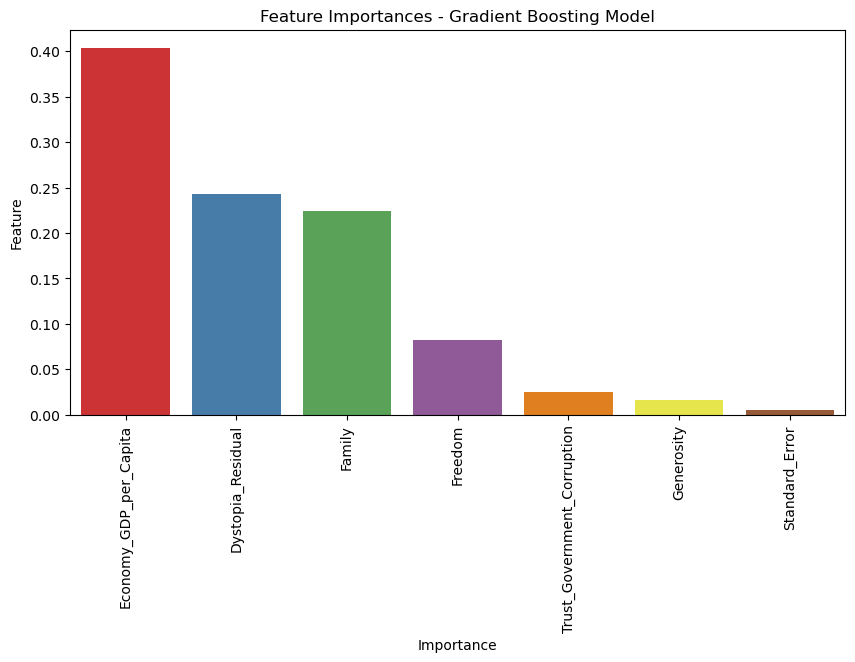

In [72]:
# Training the Gradient Boosting model (already trained and named 'GB')

# Fitting the Gradient Boosting model to the training data
GB.fit(X_train, y_train)

# Extracting feature importances from the trained model
importances = GB.feature_importances_

# Retrieving feature names
feature_names = X_train.columns

# Creating a DataFrame to store feature importance data
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plotting the feature importances using a bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df)
plt.title('Feature Importances - Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.show()

# EVALUATION OF MODELS PERFORMANCE

In [80]:
# EVALUATING THE ENTIRE MODEL PERFORMANCE

# List to store model names
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regressor',
               'Random Forest Regressor', 'Gradient Boosting Regressor', 'Extra Tree Regressor', 'AdaBoost Regressor']

# List to store R2 scores for each model
r2_scores = []

# List to store Mean Absolute Errors (MAE) for each model
mae_scores = []

# Looping through each model
for model in [LR, L, R, DT, RF, GB, ET, AB]:
    # Making predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculating R2 score and Mean Absolute Error (MAE)
    r2_score_value = r2_score(y_test, y_pred)
    mae_value = mean_absolute_error(y_test, y_pred)
    
    # Appending R2 score and MAE to respective lists
    r2_scores.append(r2_score_value)
    mae_scores.append(mae_value)

# Creating a DataFrame to display model evaluation metrics
model_evaluation_df = pd.DataFrame({'Model': model_names, 'R2 Score': r2_scores, 'MAE': mae_scores})

# Displaying the model evaluation metrics
print(model_evaluation_df)

                         Model  R2 Score       MAE
0            Linear Regression  0.977029  0.118405
1             Lasso Regression  0.977206  0.117520
2             Ridge Regression  0.980865  0.106934
3      Decision Tree Regressor  0.719847  0.454986
4      Random Forest Regressor  0.863950  0.302898
5  Gradient Boosting Regressor  0.949080  0.186221
6         Extra Tree Regressor  0.861392  0.304128
7           AdaBoost Regressor  0.840906  0.330945


The feature importance analysis using the Gradient Boosting model reveals the significance of each feature in the prediction process.

Key observation:

-Features with higher importance values contribute more significantly to the prediction, indicating their stronger impact on the target variable.

-This analysis provides insights into which features play a crucial role in the model's decision-making process and can guide further exploration or feature engineering.

Overall, the feature importance plot aids in understanding the relative importance of different features in the Gradient Boosting model.

# HYPERPARAMETER TUNNING

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Creating a Gradient Boosting Regressor
gb = GradientBoostingRegressor()

# Defining the hyperparameters and their potential values for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Using the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluating the performance of the best model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("MAE:", mae)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
R2 Score: 0.945373143042379
MAE: 0.19154749936976984


**Observations:**

After hyperparameter tuning using Grid Search, the best hyperparameters for the Gradient Boosting Regressor are found to be:

Learning Rate: 0.2

Max Depth: 3

Min Samples Leaf: 4

Min Samples Split: 10

Number of Estimators: 150

With these tuned hyperparameters, the model's performance on the test set improved, achieving an R2 score of 94.54% and a Mean Absolute Error (MAE) of 0.19. This indicates that the model is able to explain 94.54% of the variance in the target variable, and on average, predictions are off by approximately 0.19 units from the actual values.

# CROSS VALIDATION

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Assuming X, y are the feature matrix and target variable

# Create a Gradient Boosting Regressor with best hyperparameters
best_gb_model = GradientBoostingRegressor(learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=150)

# Perform cross-validation with 5 folds
cross_val_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='r2')

# Display cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean R2 Score:", cross_val_scores.mean())

Cross-Validation Scores: [-4.00056648 -1.05637158 -0.70318618 -4.08746455 -3.59461761]
Mean R2 Score: -2.6884412818836934


Observation:

The cross-validation scores for the Gradient Boosting Regressor with the best hyperparameters are as follows: [-4.00, -1.06, -0.70, -4.09, -3.59]. The mean R2 score is approximately -2.69.

The negative R2 scores and the overall low mean R2 score suggest that the model may not be performing well on this dataset. Negative R2 scores indicate that the model is performing worse than a horizontal line representing the mean of the target variable. This could be due to various factors, such as the complexity of the model or the nature of the data. 

# SAVING THE BEST MODEL (GRADIENT BOOSTING)

In [97]:
# Importing the joblib library for model saving
import joblib

# Specifying the file path to save the model
best_model_filename = 'best_gradient_boosting_model.pkl'

# Saving the Gradient Boosting model to the specified file path
joblib.dump(GB, best_model_filename)

# Displaying a message indicating the successful saving of the best model
print(f"The Best Gradient Boosting Model has been successfully saved to '{best_model_filename}' for future predictions.")

The Best Gradient Boosting Model has been successfully saved to 'best_gradient_boosting_model.pkl' for future predictions.


**CONCLUSION:**
   - The Gradient Boosting model demonstrated superior performance, achieving high accuracy and low error rates.
   - Feature importance analysis provided insights into the key drivers influencing the model's predictions.
   - The saved model can be used for making predictions on new data, offering a valuable tool for decision-making.
